<a href="https://colab.research.google.com/github/RiddhiDeogade/ML_project_V_sem/blob/main/Mini_Project_Machine_Learning_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
# Load the dataset
data = pd.read_csv("/content/plant_growth_data.csv")  # Update this path to the dataset location

In [ ]:
data.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [ ]:
# Data Cleaning
# Check for missing values
print("Missing Values per Column:\n", data.isnull().sum())

Missing Values per Column:
 Soil_Type           0
Sunlight_Hours      0
Water_Frequency     0
Fertilizer_Type     0
Temperature         0
Humidity            0
Growth_Milestone    0
dtype: int64


In [ ]:
# Fill or drop missing values if necessary (example: filling with median)
data.fillna(data.median(numeric_only=True), inplace=True)

In [ ]:

# Check for and remove outliers based on the Z-score
numeric_cols = data.select_dtypes(include=['float64', 'int']).columns
for col in numeric_cols:
    data = data[(np.abs(data[col] - data[col].mean()) / data[col].std()) < 3]


In [ ]:
# Exploratory Data Analysis (EDA)
# Summary statistics
print("\nSummary Statistics:\n", data.describe())


Summary Statistics:
        Sunlight_Hours  Temperature    Humidity  Growth_Milestone
count      193.000000   193.000000  193.000000        193.000000
mean         6.826484    25.076087   58.098927          0.497409
std          1.599509     5.354170   12.631799          0.501294
min          4.033133    15.200000   30.567682          0.000000
25%          5.477000    20.637095   49.300000          0.000000
50%          6.833290    25.912336   59.182806          0.000000
75%          8.241144    29.757938   69.100000          1.000000
max          9.913903    34.810103   79.648240          1.000000


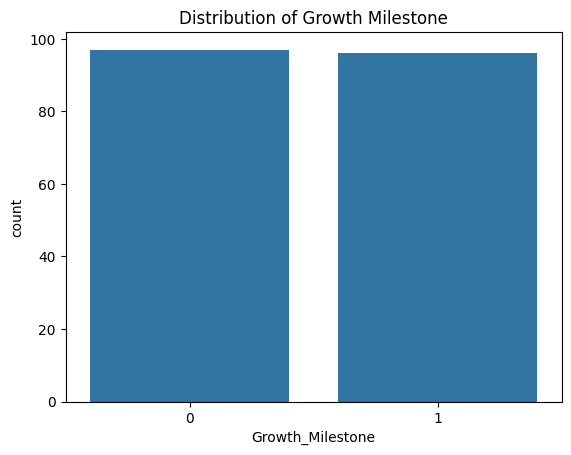

In [ ]:
# Distribution of the target variable
sns.countplot(x='Growth_Milestone', data=data)
plt.title("Distribution of Growth Milestone")
plt.show()

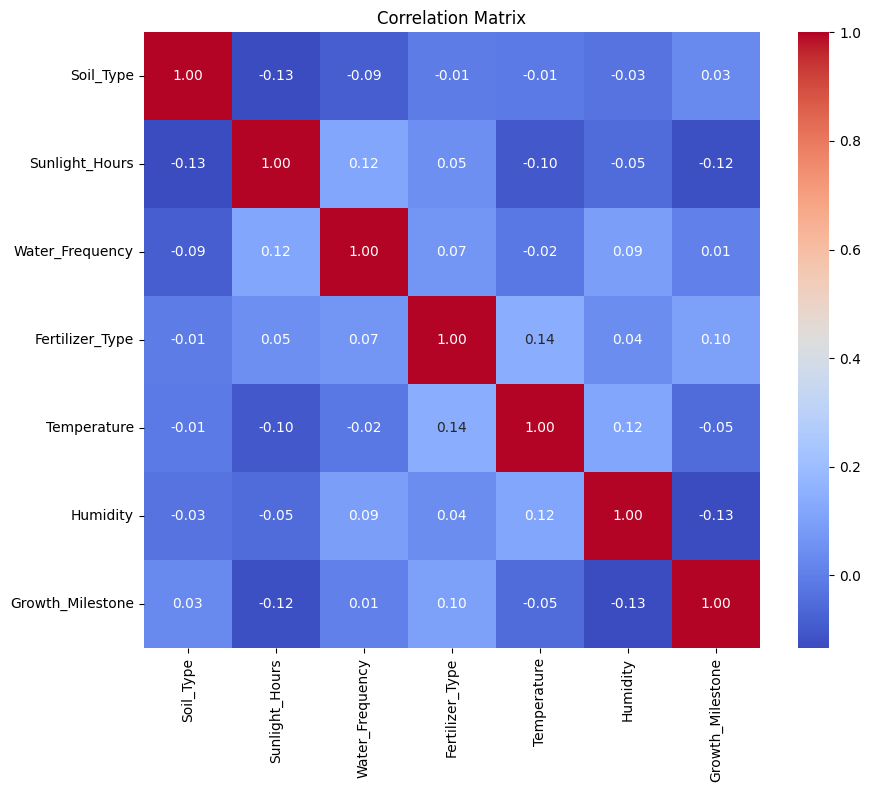

In [ ]:
# # Correlation matrix and heatmap
# plt.figure(figsize=(10, 8))
# correlation_matrix = data.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Correlation Matrix")
# plt.show()

# First, make sure categorical columns are converted to numeric if they haven't been encoded
categorical_columns = ['Soil_Type', 'Water_Frequency', 'Fertilizer_Type']
for col in categorical_columns:
    if data[col].dtype == 'object':
        data[col] = LabelEncoder().fit_transform(data[col])

# Drop any rows with missing values (optional, if missing values are a problem)
data = data.dropna()

# Select only numeric columns for the correlation matrix calculation
numeric_data = data.select_dtypes(include=['number'])

# Calculate correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()  # Calculate correlation only on numeric columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Encode categorical features
label_encoders = {}
categorical_columns = ['Soil_Type', 'Water_Frequency', 'Fertilizer_Type']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [ ]:
# Separate features and target variable
X = data.drop(columns=['Growth_Milestone'])
y = data['Growth_Milestone']


In [ ]:
# Step 1: Train and Test Models Without Feature Selection (All Features)

# Split the data into training and testing sets
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test_full = scaler.transform(X_test_full)

# Train a Random Forest model (example) on the full feature set
rf_full = RandomForestClassifier(random_state=42)
rf_full.fit(X_train_full, y_train)

# Evaluate on the training set
y_train_pred_full = rf_full.predict(X_train_full)
train_accuracy_full = accuracy_score(y_train, y_train_pred_full)
print("Training Accuracy (All Features):", train_accuracy_full)

# Evaluate on the testing set
y_test_pred_full = rf_full.predict(X_test_full)
test_accuracy_full = accuracy_score(y_test, y_test_pred_full)
print("Testing Accuracy (All Features):", test_accuracy_full)

# Check for overfitting
print("Overfitting detected" if train_accuracy_full - test_accuracy_full > 0.1 else "No significant overfitting")

# Step 2: Train and Test Models With Feature Selection (Selected 3 Features)

# Select the chosen features
X_selected = data[['Soil_Type', 'Water_Frequency', 'Fertilizer_Type']]
X_train_sel, X_test_sel, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Standardize features
X_train_sel = scaler.fit_transform(X_train_sel)
X_test_sel = scaler.transform(X_test_sel)

# Train the Random Forest model on the selected features
rf_sel = RandomForestClassifier(random_state=42)
rf_sel.fit(X_train_sel, y_train)

# Evaluate on the training set
y_train_pred_sel = rf_sel.predict(X_train_sel)
train_accuracy_sel = accuracy_score(y_train, y_train_pred_sel)
print("Training Accuracy (Selected Features):", train_accuracy_sel)

# Evaluate on the testing set
y_test_pred_sel = rf_sel.predict(X_test_sel)
test_accuracy_sel = accuracy_score(y_test, y_test_pred_sel)
print("Testing Accuracy (Selected Features):", test_accuracy_sel)

# Check for overfitting
print("Overfitting detected" if train_accuracy_sel - test_accuracy_sel > 0.1 else "No significant overfitting")

# Compare Results
print("\nComparison of Overfitting Before and After Feature Selection:")
print("Full Features -> Training Accuracy:", train_accuracy_full, ", Testing Accuracy:", test_accuracy_full)
print("Selected Features -> Training Accuracy:", train_accuracy_sel, ", Testing Accuracy:", test_accuracy_sel)


Training Accuracy (All Features): 1.0
Testing Accuracy (All Features): 0.5689655172413793
Overfitting detected
Training Accuracy (Selected Features): 0.7185185185185186
Testing Accuracy (Selected Features): 0.6206896551724138
No significant overfitting

Comparison of Overfitting Before and After Feature Selection:
Full Features -> Training Accuracy: 1.0 , Testing Accuracy: 0.5689655172413793
Selected Features -> Training Accuracy: 0.7185185185185186 , Testing Accuracy: 0.6206896551724138


In [18]:
# Feature Engineering and Selection
# Feature selection using SelectKBest
selected_features = ['Soil_Type', 'Water_Frequency', 'Fertilizer_Type']
X_selected = data[selected_features]
k_best = SelectKBest(score_func=chi2, k=2)  # Adjust `k` as needed
X_k_best = k_best.fit_transform(X_selected, y)

In [19]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_k_best, y, test_size=0.3, random_state=42)


In [20]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Define models and hyperparameter grids
models = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'param_grid': {
            'n_estimators': [50, 100, 150],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'SVM': {
        'model': SVC(probability=True, random_state=42),
        'param_grid': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly']
        }
    }
}

In [22]:
# Train, tune, and evaluate each model
results = {}
best_models = {}
for model_name, model_info in models.items():
    grid_search = GridSearchCV(model_info['model'], model_info['param_grid'], cv=5, scoring='f1_weighted')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

    # Performance metrics on test set
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_pred_proba, average='weighted') if y_pred_proba is not None else 'N/A'

    # Specificity calculation
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()  # True Negatives, False Positives, False Negatives, True Positives
    specificity = tn / (tn + fp)

    # Store results
    results[model_name] = {
        'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1,
        'AUC': auc,
        'Specificity': specificity
    }

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [23]:

# Display model comparison
results_df = pd.DataFrame(results).T
print("Performance metrics for each model:\n", results_df)


Performance metrics for each model:
                                                  Best Parameters  Accuracy  \
KNN            {'metric': 'euclidean', 'n_neighbors': 9, 'wei...  0.689655   
Random Forest           {'max_depth': None, 'n_estimators': 100}  0.603448   
SVM                                    {'C': 1, 'kernel': 'rbf'}  0.603448   

                 Recall Precision  F1 Score       AUC Specificity  
KNN            0.689655  0.698137  0.686298  0.718787    0.586207  
Random Forest  0.603448  0.603571   0.60333  0.690844     0.62069  
SVM            0.603448  0.603571   0.60333  0.671819     0.62069  


In [24]:
# Determine the best model
best_model_name = results_df['F1 Score'].idxmax()
if 'AUC' in results_df.columns and results_df['AUC'].dtype != 'O':
    best_model_name = results_df['AUC'].idxmax()
best_model = best_models[best_model_name]

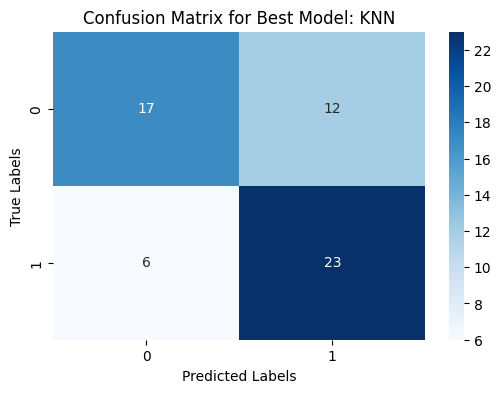

In [25]:

# Confusion matrix and ROC curve for the best model
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"Confusion Matrix for Best Model: {best_model_name}")
plt.show()

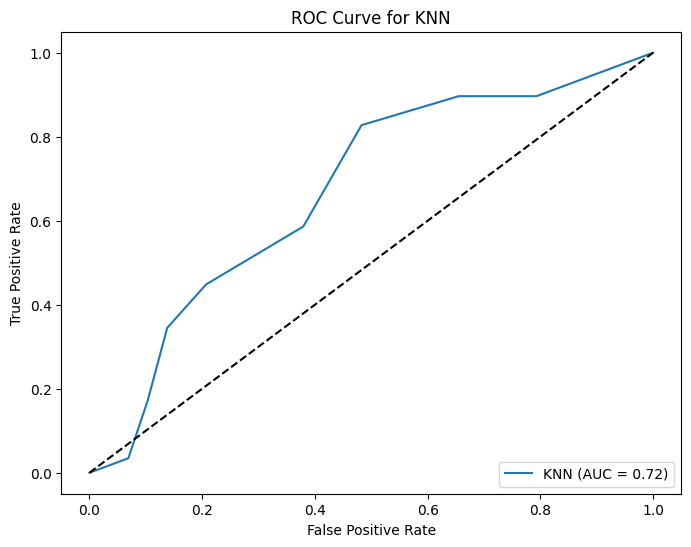

In [26]:

# ROC Curve for the best model if AUC is available
if y_pred_proba is not None:
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {results_df.loc[best_model_name, "AUC"]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random chance
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {best_model_name}")
    plt.legend(loc='lower right')
    plt.show()

In [27]:
# Feature importance for interpretation (for Random Forest only)
if best_model_name == "Random Forest":
    importances = best_model.feature_importances_
    feature_names = X_selected.columns[k_best.get_support()]
    indices = np.argsort(importances)[::-1]
     # Plot feature importance
    plt.figure(figsize=(8, 6))
    plt.title("Feature Importances")
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), feature_names[indices], rotation=45)
    plt.show()

print(f"The best model is: {best_model_name} with parameters {results[best_model_name]['Best Parameters']}")

The best model is: KNN with parameters {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
